In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
!pip install xgboost
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import eli5
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
import statsmodels.api as sm
import time
!pip install mlxtend
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\6th sem\project\final_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  float64
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [3]:
#checking for NA values
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Average                                0
satisfaction    

In [4]:
del data[data.columns[-3]]

In [5]:
data.dropna(axis = 0, how = "any", inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  float64
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

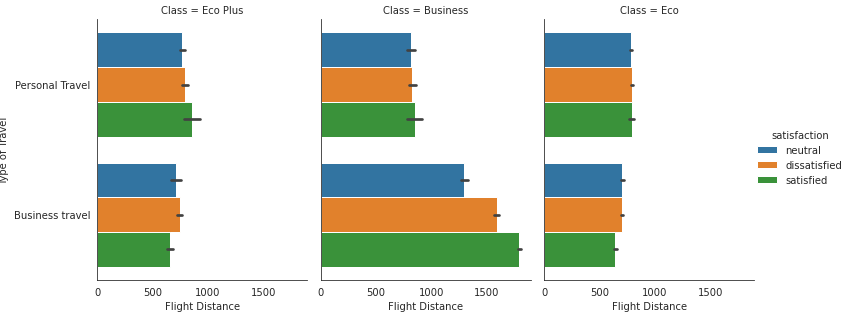

In [7]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=.8)

Type of Travel and Flight Distance grouped by Class:
For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied,neutral and dissatisfied passengers are present.

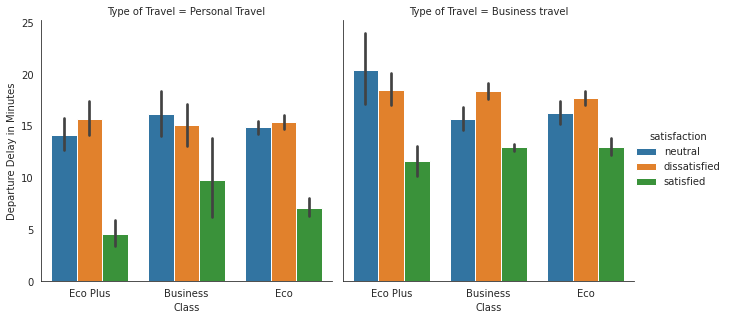

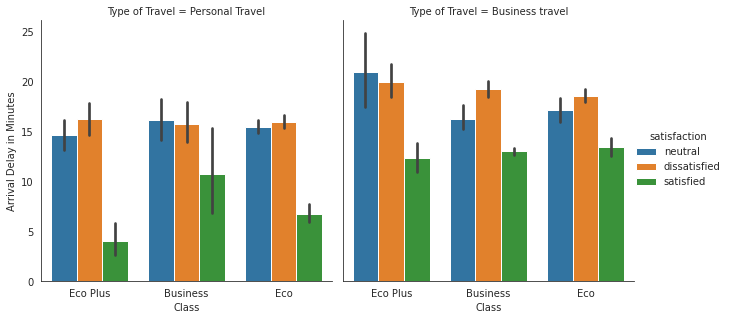

In [8]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=4.5, aspect=1.0)

<AxesSubplot:xlabel='type_of_flight', ylabel='count'>

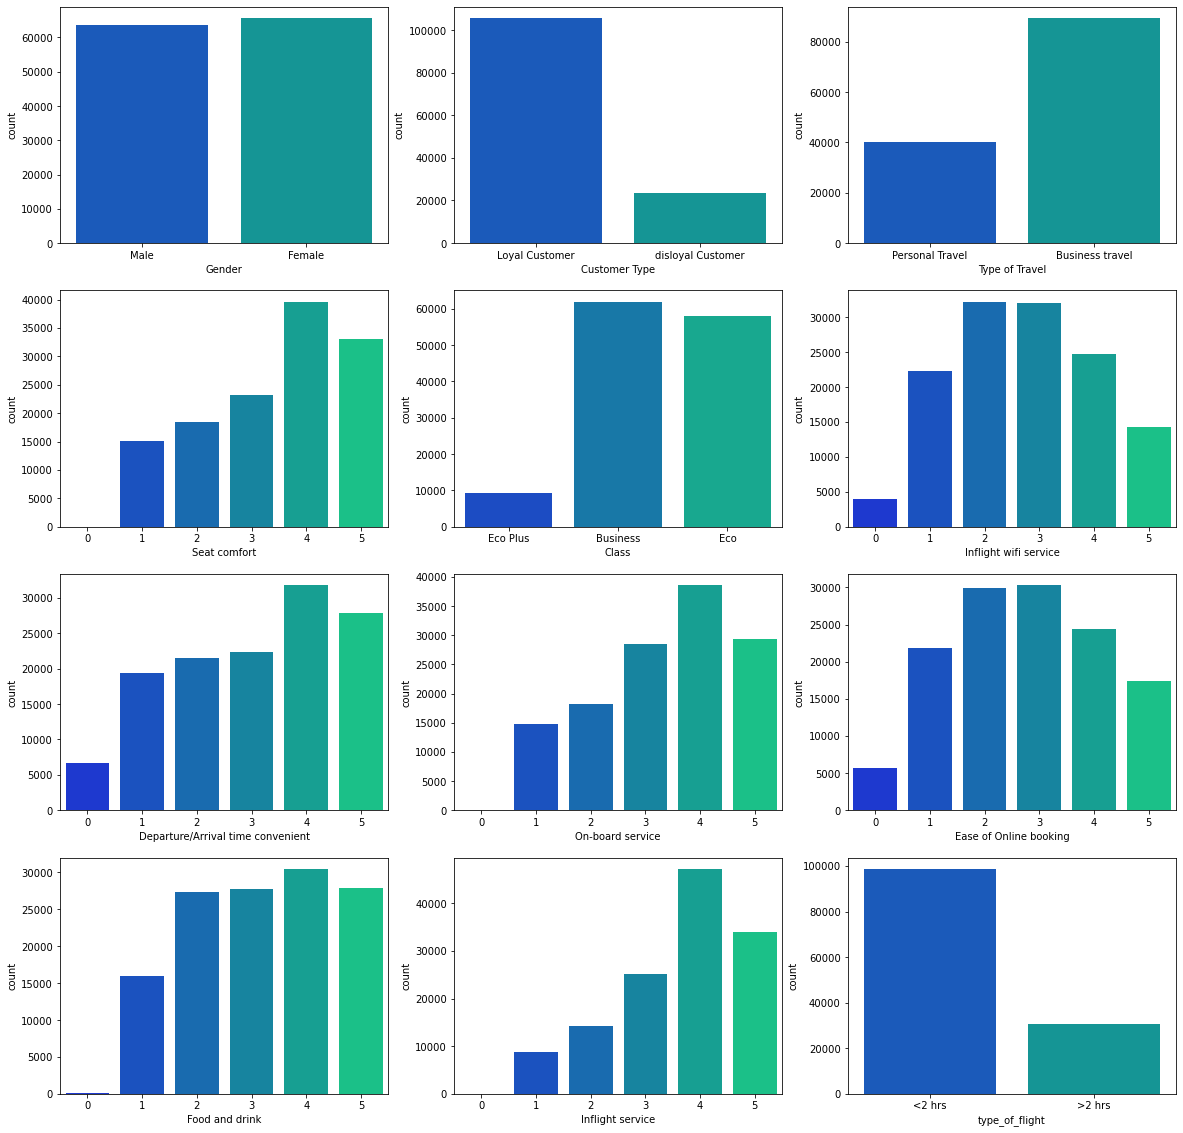

In [9]:
#Explorator Data Analysis
fig, axes = plt.subplots(4, 3 , figsize = (20,20))
sns.countplot(x = 'Gender', data = data, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = data, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = data, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = data, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = data, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = data, palette= 'winter', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = data, palette= 'winter', ax = axes[3, 1]);
sns.countplot(x = 'type_of_flight', data = data, palette= 'winter', ax = axes[3, 2])

People travelling for business is more than that for personal. They travel from business & economic class more than eco plus

<AxesSubplot:xlabel='Cleanliness', ylabel='count'>

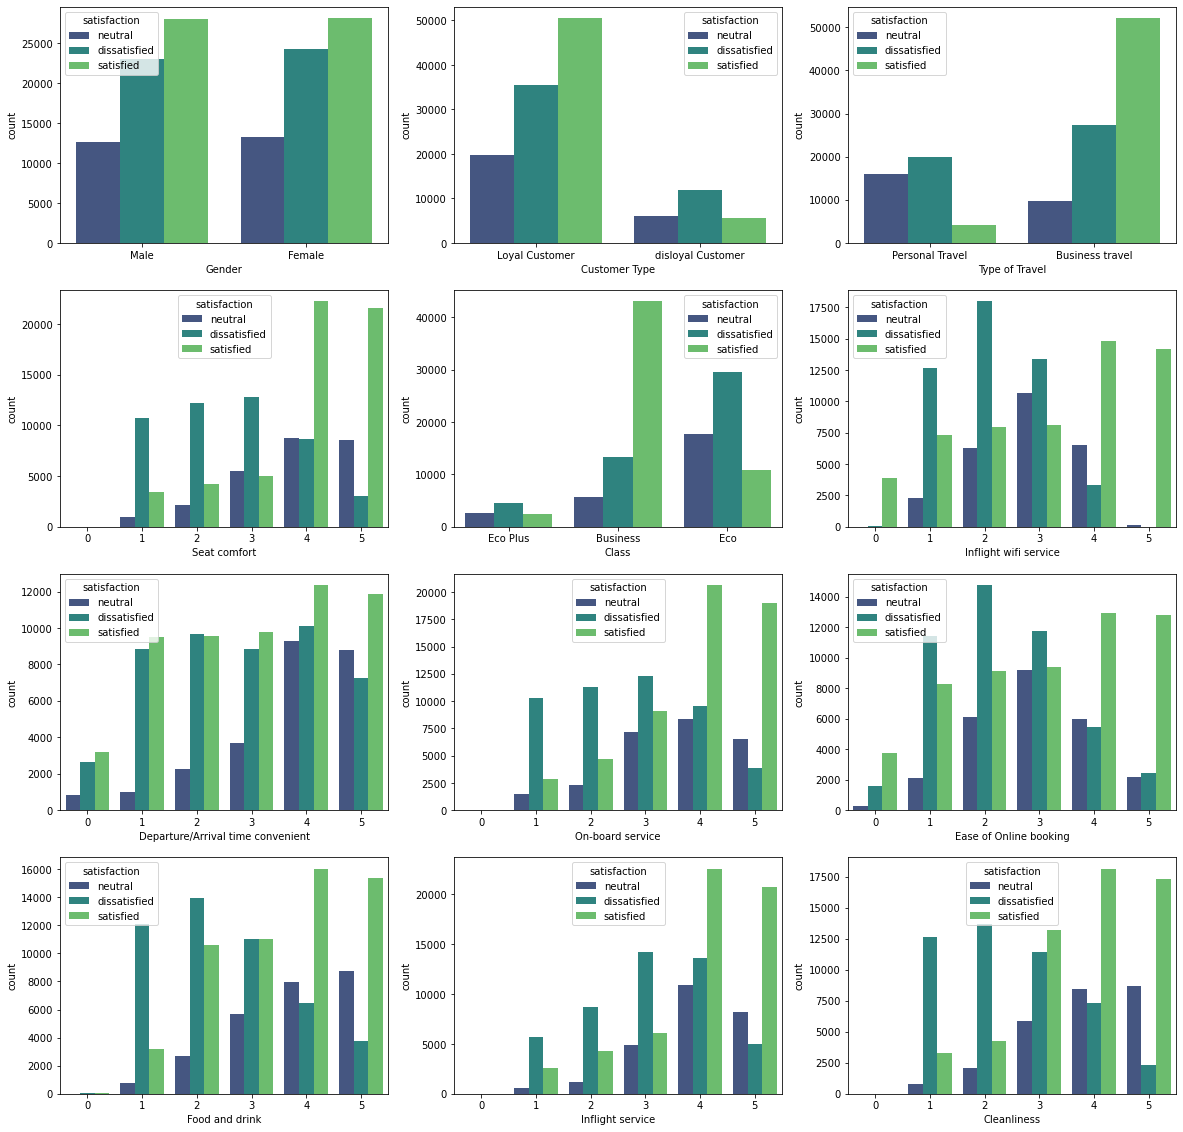

In [10]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = data, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'Cleanliness', data = data, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2])

Business travlers are more satisfied with their travel as compared to people traveling for personal.
Satisfaction: Business> Eco>Eco plus

<AxesSubplot:>

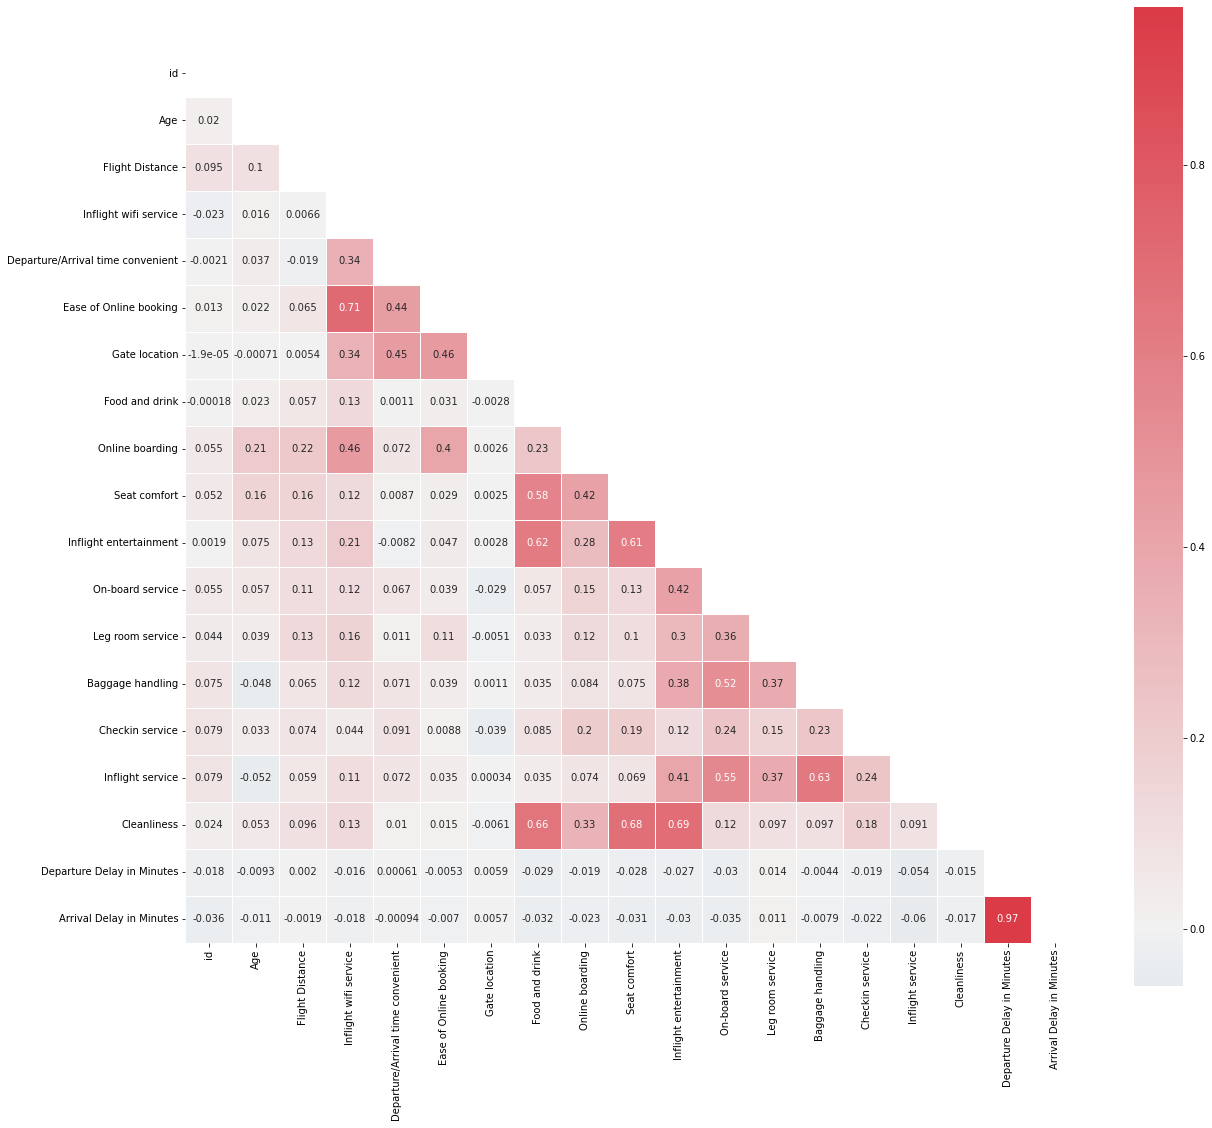

In [11]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service" and "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

## Bifurcating by Class

In [12]:
data1 = data[(data['Type of Travel'] == "Personal Travel")]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40042 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 40042 non-null  float64
 1   Gender                             40042 non-null  object 
 2   Customer Type                      40042 non-null  object 
 3   Age                                40042 non-null  int64  
 4   Type of Travel                     40042 non-null  object 
 5   Class                              40042 non-null  object 
 6   Flight Distance                    40042 non-null  int64  
 7   Inflight wifi service              40042 non-null  int64  
 8   Departure/Arrival time convenient  40042 non-null  int64  
 9   Ease of Online booking             40042 non-null  int64  
 10  Gate location                      40042 non-null  int64  
 11  Food and drink                     40042 non-null  in

<AxesSubplot:xlabel='type_of_flight', ylabel='count'>

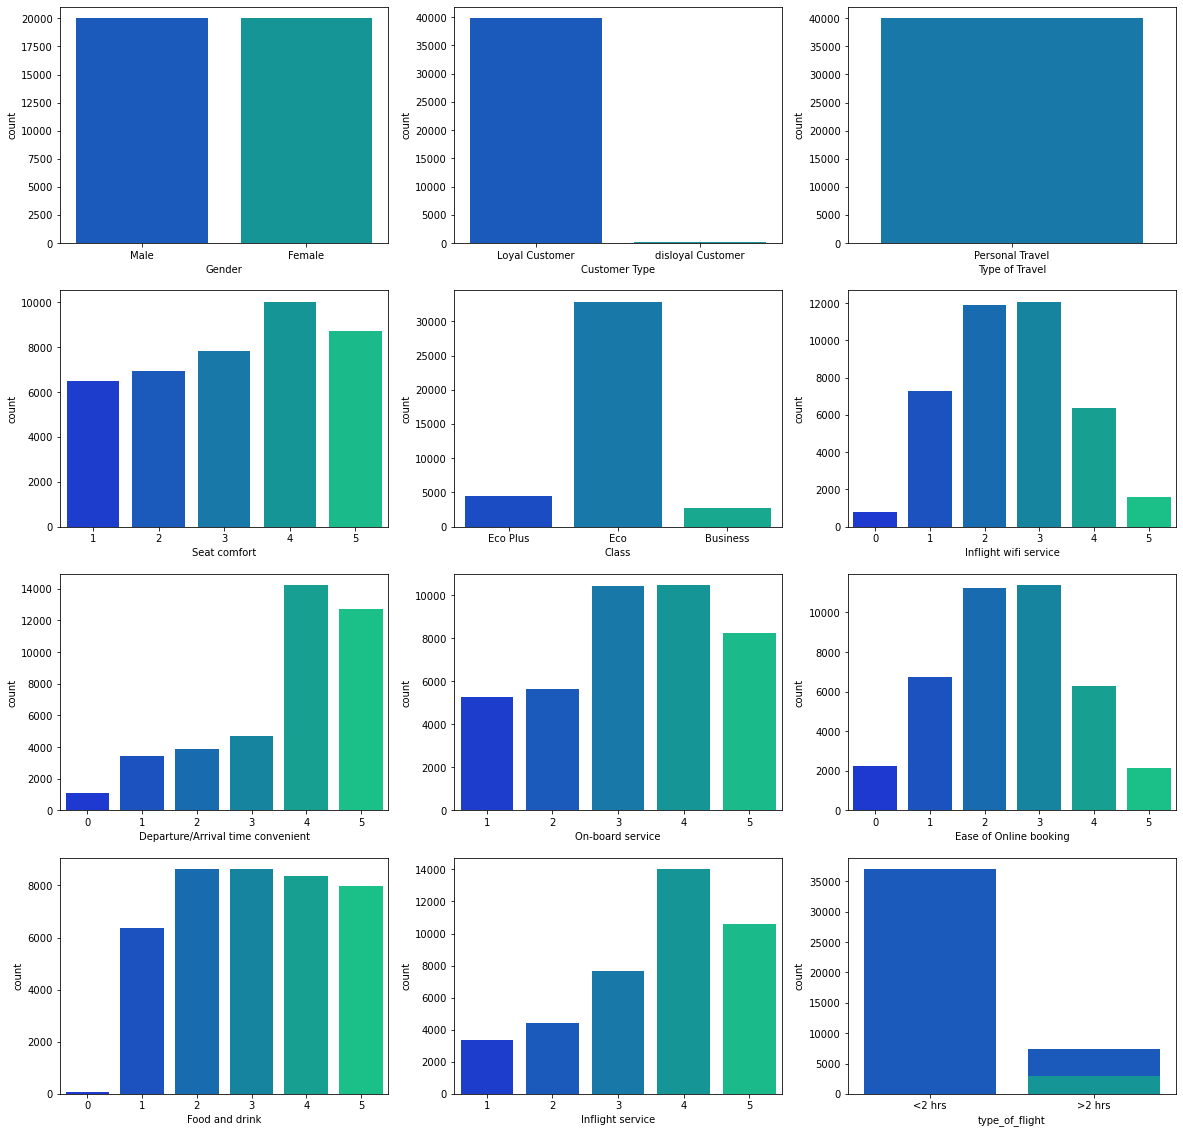

In [13]:
#Explorator Data Analysis
fig, axes = plt.subplots(4, 3 , figsize = (20,20))
sns.countplot(x = 'Gender', data = data1, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data1, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data1, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data1, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = data1, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = data1, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data1, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = data1, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = data1, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = data1, palette= 'winter', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = data1, palette= 'winter', ax = axes[3, 1]);
sns.countplot(x = 'Cleanliness', data = data1, palette= 'winter', ax = axes[3, 2]);
sns.countplot(x = 'type_of_flight', data = data1, palette= 'winter', ax = axes[3, 2])

<AxesSubplot:xlabel='type_of_flight', ylabel='count'>

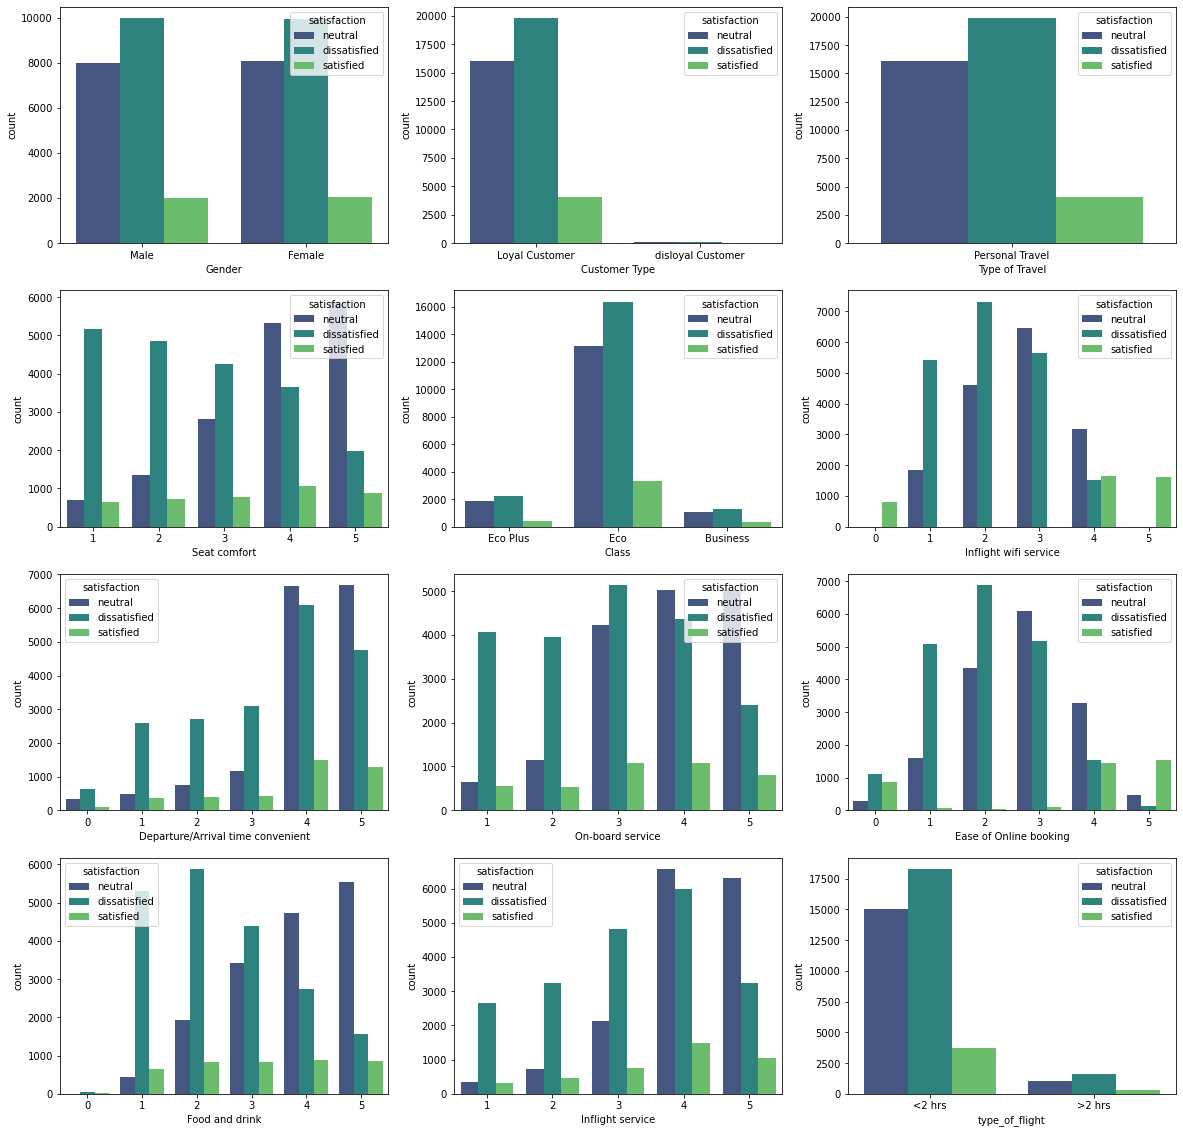

In [14]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = data1, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'type_of_flight', data = data1, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2])


All personal travel customers are loyal customers. Majortiy people travel in economic class.

In [15]:
sub1 = data1[(data1['type_of_flight'] == '<2 hrs')]
sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37057 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 37057 non-null  float64
 1   Gender                             37057 non-null  object 
 2   Customer Type                      37057 non-null  object 
 3   Age                                37057 non-null  int64  
 4   Type of Travel                     37057 non-null  object 
 5   Class                              37057 non-null  object 
 6   Flight Distance                    37057 non-null  int64  
 7   Inflight wifi service              37057 non-null  int64  
 8   Departure/Arrival time convenient  37057 non-null  int64  
 9   Ease of Online booking             37057 non-null  int64  
 10  Gate location                      37057 non-null  int64  
 11  Food and drink                     37057 non-null  in

In [16]:
sub2 = sub1[(sub1['Class'] == 'Eco')]
sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30477 entries, 5 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 30477 non-null  float64
 1   Gender                             30477 non-null  object 
 2   Customer Type                      30477 non-null  object 
 3   Age                                30477 non-null  int64  
 4   Type of Travel                     30477 non-null  object 
 5   Class                              30477 non-null  object 
 6   Flight Distance                    30477 non-null  int64  
 7   Inflight wifi service              30477 non-null  int64  
 8   Departure/Arrival time convenient  30477 non-null  int64  
 9   Ease of Online booking             30477 non-null  int64  
 10  Gate location                      30477 non-null  int64  
 11  Food and drink                     30477 non-null  in

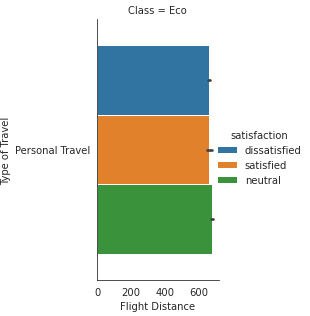

In [17]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=sub2, kind="bar", height=4.5, aspect=.8)

## Feature Selection

In [18]:
#dropping unnecessary variables
sub2.drop(['id','Gender'], axis = 1, inplace = True)

In [19]:
sub2.drop(['Customer Type','Age','Flight Distance'], axis = 1, inplace = True)

In [20]:
sub2.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], axis = 1, inplace = True)

In [21]:
#Label Encoding for categorical variables
lencoders = {}
for col in sub2.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    sub2[col] = lencoders[col].fit_transform(sub2[col])

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Separate the target variable and features
X = sub2.drop('satisfaction', axis=1)
y = sub2['satisfaction']

# Define the model
model = LogisticRegression()

# Define the RFE algorithm with cross-validation
rfe = RFE(model, n_features_to_select=5, step=1)

# Fit the RFE algorithm to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(selected_features)

Index(['Inflight wifi service', 'Food and drink', 'On-board service',
       'Inflight service', 'Cleanliness'],
      dtype='object')


#1. __Chi-square__

In [23]:
X = sub2.drop('satisfaction', axis=1)
y = sub2['satisfaction']
# Apply chi-square feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Print the selected features
print(selected_features)

Index(['Ease of Online booking', 'Food and drink', 'Seat comfort',
       'Inflight entertainment', 'Cleanliness'],
      dtype='object')


#2. __Wrapper Method__

In [24]:
X = sub2.drop('satisfaction', axis=1)
y = sub2['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Inflight service', 'Cleanliness']
[0.         0.         0.15997204 0.06417865 0.08160041 0.05132709
 0.05762834 0.05457734 0.0601791  0.10109424 0.06492155 0.05417751
 0.05646463 0.05834648 0.06356673 0.0719659  0.        ]


#3. __Info Gain__

In [25]:
#info gain
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = sub2.drop('satisfaction', axis=1)
y = sub2['satisfaction']
# Apply information gain feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Print the selected features
print(selected_features)

Index(['Inflight wifi service', 'Ease of Online booking', 'Food and drink',
       'Inflight entertainment', 'Cleanliness'],
      dtype='object')


## Model Building 

In [26]:
#Diving into train and test data
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
features = ['Inflight wifi service','Ease of Online booking','On-board service','Food and drink',
            'Inflight entertainment','Cleanliness','Inflight service']
target = ['satisfaction']

In [28]:
train, test = train_test_split(sub2, test_size = 0.3)

In [29]:
# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [30]:
train['satisfaction'].replace({'dissatisfied': 0,'neutral':1, 'satisfied': 2}, inplace = True)
test['satisfaction'].replace({'dissatisfied': 0,'neutral':1, 'satisfied': 2}, inplace = True)

#1. __Multinomial Logistic Regression__

In [31]:
#checking for assumption
from statsmodels.stats.outliers_influence import variance_inflation_factor
A = sub2[['Inflight wifi service','Ease of Online booking','On-board service','Food and drink',
            'Inflight entertainment','Cleanliness','Inflight service']]
vif_data = pd.DataFrame()
vif_data["feature"] = A.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(A.values, i)
                          for i in range(len(A.columns))]
  
print(vif_data)

                  feature        VIF
0   Inflight wifi service  17.394986
1  Ease of Online booking  15.108835
2        On-board service   9.645910
3          Food and drink  20.462895
4  Inflight entertainment  21.108651
5             Cleanliness  21.058703
6        Inflight service  11.658226


In [32]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

# Predict the classes of the test data using the trained logistic regression model
y_pred = logistic_model.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.8074146981627297


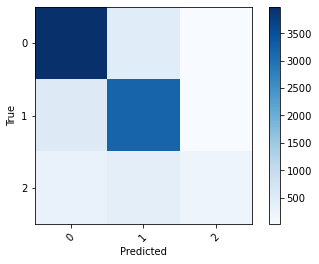

In [33]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [34]:
c_m = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = [False, True])
cm_display.plot()
plt.show()

NameError: name 'metrics' is not defined

In [ ]:
print(classification_report(y_pred,y_test))

##2. __Decision Trees__

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image

In [ ]:
# Define the range of values for the max_depth parameter to test
param_grid = {'max_depth': range(1, 10)}

In [ ]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

In [ ]:
# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best value of the max_depth parameter found by the grid search
print('Best max_depth:', grid_search.best_params_['max_depth'])

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a decision tree classifier with max_depth of 3
dtc = DecisionTreeClassifier(max_depth=9, random_state = 0)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict the dependent variable on the test data
y_pred1 = dtc.predict(X_test)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred1)

# Print the accuracy score
print('Accuracy:', accuracy)

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 

In [ ]:
print(classification_report(y_pred1,y_test))

##3. __Random Forests__

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for the number of estimators and random state
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42, 123, 456]
}

# Create a GridSearchCV object to find the best hyperparameters
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
rfc_grid.fit(X_train, y_train)

# Print the best hyperparameters found by the GridSearchCV object
print("Best parameters:", rfc_grid.best_params_)


In [ ]:
# Create a Random Forest Classifier object
rfc = RandomForestClassifier(max_depth=16,n_estimators=500, random_state=456)

# Train the model using the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred2 = rfc.predict(X_test)

# Evaluate the accuracy of the model
#accuracy = rfc.score(X_test, y_test)

#print("Accuracy:", accuracy)

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

In [ ]:
 #Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 

In [ ]:
from sklearn import metrics 
c_m = confusion_matrix(y_test, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_pred2,y_test))

#4. __Extreme Gradient Boost__

In [ ]:
# Define the XGBoost model
model = xgb.XGBClassifier(max_depth=16, n_estimators=500)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred3 = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_pred3,y_test))

## Bifurcating Again

In [35]:
data2 = data[(data['Type of Travel'] == "Business travel")]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89445 entries, 1 to 129878
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 89445 non-null  float64
 1   Gender                             89445 non-null  object 
 2   Customer Type                      89445 non-null  object 
 3   Age                                89445 non-null  int64  
 4   Type of Travel                     89445 non-null  object 
 5   Class                              89445 non-null  object 
 6   Flight Distance                    89445 non-null  int64  
 7   Inflight wifi service              89445 non-null  int64  
 8   Departure/Arrival time convenient  89445 non-null  int64  
 9   Ease of Online booking             89445 non-null  int64  
 10  Gate location                      89445 non-null  int64  
 11  Food and drink                     89445 non-null  in

In [ ]:
#Explorator Data Analysis
fig, axes = plt.subplots(4, 3 , figsize = (20,20))
sns.countplot(x = 'Gender', data = data2, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = data2, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = data2, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = data2, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = data2, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = data2, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = data2, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = data2, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = data2, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = data2, palette= 'winter', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = data2, palette= 'winter', ax = axes[3, 1]);
sns.countplot(x = 'type_of_flight', data = data2, palette= 'winter', ax = axes[3, 2])

Majority are loyal customers but also contains a bunch of disloyal customers too. Majority are business class travelers and are satisfied mostly so data science is not required much. 

In [36]:
sub3 = data2[(data2['type_of_flight'] == "<2 hrs")]
sub3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61703 entries, 1 to 129878
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 61703 non-null  float64
 1   Gender                             61703 non-null  object 
 2   Customer Type                      61703 non-null  object 
 3   Age                                61703 non-null  int64  
 4   Type of Travel                     61703 non-null  object 
 5   Class                              61703 non-null  object 
 6   Flight Distance                    61703 non-null  int64  
 7   Inflight wifi service              61703 non-null  int64  
 8   Departure/Arrival time convenient  61703 non-null  int64  
 9   Ease of Online booking             61703 non-null  int64  
 10  Gate location                      61703 non-null  int64  
 11  Food and drink                     61703 non-null  in

In [ ]:
#Explorator Data Analysis
fig, axes = plt.subplots(4, 3 , figsize = (20,20))
sns.countplot(x = 'Gender', data = sub3, palette= 'winter', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sub3, palette= 'winter', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sub3, palette= 'winter', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sub3, palette= 'winter', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = sub3, palette= 'winter', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = sub3, palette= 'winter', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sub3, palette= 'winter', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = sub3, palette= 'winter', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = sub3, palette= 'winter', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = sub3, palette= 'winter', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = sub3, palette= 'winter', ax = axes[3, 1]);
sns.countplot(x = 'type_of_flight', data = sub3, palette= 'winter', ax = axes[3, 2])

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))
sns.countplot(x = 'Gender', data = sub3, hue= 'satisfaction', palette= 'viridis', ax = axes[0, 0]);
sns.countplot(x = 'Customer Type', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 1]);
sns.countplot(x = 'Type of Travel', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[0, 2]);
sns.countplot(x = 'Seat comfort', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 0]);
sns.countplot(x = 'Class', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 1]);
sns.countplot(x = 'Inflight wifi service', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[1, 2]);
sns.countplot(x = 'Departure/Arrival time convenient', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 0]);
sns.countplot(x = 'On-board service', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 1]);
sns.countplot(x = 'Ease of Online booking', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[2, 2]);
sns.countplot(x = 'Food and drink', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 0]);
sns.countplot(x = 'Inflight service', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[3,  1]);
sns.countplot(x = 'type_of_flight', data = sub3, hue= 'satisfaction',  palette= 'viridis', ax = axes[3, 2])


In [37]:
sub4 = sub3[(sub3['Class'] == "Eco")]
sub4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24376 entries, 9 to 129874
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 24376 non-null  float64
 1   Gender                             24376 non-null  object 
 2   Customer Type                      24376 non-null  object 
 3   Age                                24376 non-null  int64  
 4   Type of Travel                     24376 non-null  object 
 5   Class                              24376 non-null  object 
 6   Flight Distance                    24376 non-null  int64  
 7   Inflight wifi service              24376 non-null  int64  
 8   Departure/Arrival time convenient  24376 non-null  int64  
 9   Ease of Online booking             24376 non-null  int64  
 10  Gate location                      24376 non-null  int64  
 11  Food and drink                     24376 non-null  in

In [ ]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction", col="Class", data=sub4, kind="bar", height=4.5, aspect=.8)

## Feature Selection

In [ ]:
#dropping unnecessary variables
sub4.drop(['id','Gender'], axis = 1, inplace = True)

In [ ]:
sub4.drop(['Customer Type','Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'], axis = 1, inplace = True)

In [ ]:
#Label Encoding for categorical variables
lencoders = {}
for col in sub4.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    sub4[col] = lencoders[col].fit_transform(sub4[col])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Separate the target variable and features
X = sub4.drop('satisfaction', axis=1)
y = sub4['satisfaction']

# Define the model
model = LogisticRegression()

# Define the RFE algorithm with cross-validation
rfe = RFE(model, n_features_to_select=5, step=1)

# Fit the RFE algorithm to the data
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print(selected_features)

#1. __Chi-square__

In [ ]:
X = sub4.drop('satisfaction', axis=1)
y = sub4['satisfaction']
# Apply chi-square feature selection
selector = SelectKBest(score_func=chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Print the selected features
print(selected_features)

#2. __Wrapper Method__

In [ ]:
X = sub4.drop('satisfaction', axis=1)
y = sub4['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

#3. __Info Gain__

In [ ]:
#info gain
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = sub4.drop('satisfaction', axis=1)
y = sub4['satisfaction']
# Apply information gain feature selection
selector = SelectKBest(score_func=mutual_info_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_features = X.columns[selector.get_support(indices=True)]

# Print the selected features
print(selected_features)

## Model Building 

In [ ]:
#Diving into train and test data
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
features1 = ['Inflight wifi service','Ease of Online booking','Online boarding','Food and drink',
            'Inflight entertainment','Cleanliness']
target1 = ['satisfaction']

In [ ]:
train1, test1 = train_test_split(sub2, test_size = 0.3)

In [ ]:
# Split into test and train
X_train1 = train1[features]
y_train1 = train1[target].to_numpy()
X_test1 = test1[features]
y_test1 = test1[target].to_numpy()

In [ ]:
train['satisfaction'].replace({'dissatisfied': 0,'neutral':1, 'satisfied': 2}, inplace = True)
test['satisfaction'].replace({'dissatisfied': 0,'neutral':1, 'satisfied': 2}, inplace = True)

#1. __Multinomial Logistic Regression__

In [ ]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
logistic_model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the logistic regression model on the training data
logistic_model1.fit(X_train1, y_train1)

# Predict the classes of the test data using the trained logistic regression model
pred_log = logistic_model1.predict(X_test1)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test1, pred_log)

# Print the accuracy score
print('Accuracy:', accuracy)

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(pred_log,y_test1))

##2. __Decision Trees__

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image

In [ ]:
# Define the range of values for the max_depth parameter to test
param_grid1 = {'max_depth': range(1, 10)}

In [ ]:
# Create a decision tree classifier
dtc1 = DecisionTreeClassifier()

In [ ]:
# Create a GridSearchCV object with 5-fold cross-validation
grid_search1 = GridSearchCV(dtc1, param_grid1, cv=5)

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search1.fit(X_train1, y_train1)

In [ ]:
# Print the best value of the max_depth parameter found by the grid search
print('Best max_depth:', grid_search1.best_params_['max_depth'])

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a decision tree classifier with max_depth of 9
dtc1 = DecisionTreeClassifier(max_depth=9)

# Fit the classifier to the training data
dtc1.fit(X_train1, y_train1)

# Predict the dependent variable on the test data
pred_decision = dtc1.predict(X_test1)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test1, pred_decision)

# Print the accuracy score
print('Accuracy:', accuracy)

In [ ]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train1, X_test1, y_train1):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 9, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train1, y_train1)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test1, clf_object):
  
    # Predicton on test with giniIndex
    pred_entropy = clf_object.predict(X_test1)
    print("Predicted values:")
    print(pred_entropy)
    return pred_entropy

In [ ]:
# Function to calculate accuracy
def cal_accuracy(y_test1, pred_entropy):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test1, pred_entropy))
    
    print ("Accuracy : ",
    accuracy_score(y_test1,pred_entropy)*100)
      
    print("Report : ",
    classification_report(y_test1, pred_entropy))

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(pred_decision,y_test1))

##3. __Random Forests__

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for the number of estimators and random state
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42, 123, 456]
}

# Create a GridSearchCV object to find the best hyperparameters
rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
rfc_grid.fit(X_train1, y_train1)

# Print the best hyperparameters found by the GridSearchCV object
print("Best parameters:", rfc_grid.best_params_)


In [ ]:
# Create a Random Forest Classifier object
rfc1 = RandomForestClassifier(max_depth=16,n_estimators=50, random_state=42)

# Train the model using the training data
rfc1.fit(X_train1, y_train1)

# Make predictions on the testing data
pred_random = rfc1.predict(X_test1)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test1, y_test1)

print("Accuracy:", accuracy)

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(set(y)))
plt.xticks(tick_marks, sorted(list(set(y))), rotation=45)
plt.yticks(tick_marks, sorted(list(set(y))))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(pred_random,y_test1))

In [ ]:
from sklearn import metrics 
c_m1 = confusion_matrix(y_test1, pred_random)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = c_m1, display_labels = [False, True])
cm_display1.plot()
plt.show()

#4. __Extreme Gradient Boost__

In [ ]:
# Define the XGBoost model
model1 = xgb.XGBClassifier(max_depth=16, n_estimators=500)

# Train the model
model1.fit(X_train, y_train)

# Make predictions on the test data
pred_XG = model.predict(X_test1)

# Calculate accuracy score
accuracy = accuracy_score(y_test1, pred_XG)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(pred_XG,y_test1))